<h3 align='center'>Department of Civil, Environmental and Geomatic Engineering</h3>
<h3 align='center'>Institute of Structural Engineering</h3>
<h3 align='center'>Chair of Structural Mechanics</h3>
<h3 align='center'>Structural Identification and Health Monitoring</h3>

<h3 align ='center' style="color:blue;"> First Assignment </h3>

<h4> Table of Contents </h4>
<ol>
  <li>Building Frame Dynamic Model</li>
  <li>Task 1: Modelling</li>
  <li>Task 2: Numerical integration</li>
  <li>Task 3: Modal analysis</li> 
  <li>Task 4: Modal damping</li> 
  <li>Task 5: State-space representation</li> 
  <li>Task 6: Laplace domain</li> 
  <li>Task 7: Analysis of frequency response functions (Laplace domain)</li> 
  <li>Task 8: Frequency response functions from time signals</li> 
</ol>
Submit your assignment electronically to mhaywood@ethz.ch in either *.ipynb, *.pdf, or *.html format. Use YOURNAME(S)-SIHM-ASSIGMENT1 as mail subject. You may elaborate on the assignment in groups of two.


<h3>Simplified Building Frame Model</h3>
<fig>
<img src="3storyframe.png" width=800 />
<figcaption style="color:white;">Figure 1: Diagram of 3 story frame structure with base excitation.</figcaption>
</fig>


The dynamic response of buildings under seismic excitation is of great importance for desigining and monitoring of buildings subject to earthquake loads. Figure 1 shows a simplified 3DOF model of a shear frame building. The model assumes that each story may be treated as a lumped mass connected by massless columns of linear stiffness and damping coefficients. It is assumed that excitation is applied in the form of ground acceleration and that the masses may only move in the x direction corresponding to the axis of excitation.

<h3>Task1: modelling</h3>
<i>By neglecting the effects of damping, construct the free body diagram and derive the corresponding equation of motion for every degree-of-freedom. Then bring the derived system of equations in the following matrix form.</i>

$$ \mathbf{M}\ddot{\mathbf{u}}(t) + \mathbf{K}\mathbf{u}(t) = -\mathbf{M}\mathbf{1}\ddot{x_g}(t) $$

where $\mathbf{1} = (1, 1, 1)^T$ and $\mathbf{u}(t)=(u_1(t), u_2(t), u_3(t))^T$ the relative displacements of the 1st, 2nd and 3rd storys respectively.



Assume relative displacements u = (u1, u2, u3)^T and ground motion x_g(t). Summing forces on each mass and using Newton's 2nd law gives:
\begin{align*}
m_1\ddot{u}_1 + k_1 u_1 + k_2(u_1 - u_2) &= -m_1\ddot{x}_g(t) \\
m_2\ddot{u}_2 + k_2(u_2 - u_1) + k_3(u_2 - u_3) &= -m_2\ddot{x}_g(t) \\
m_3\ddot{u}_3 + k_3(u_3 - u_2) &= -m_3\ddot{x}_g(t)
\end{align*}

Expanded form:

\begin{align*}
m_1\ddot{u}_1 + (k_1 + k_2)u_1 - k_2 u_2 &= -m_1\ddot{x}_g(t) \\
m_2\ddot{u}_2 - k_2 u_1 + (k_2 + k_3)u_2 - k_3 u_3 &= -m_2\ddot{x}_g(t) \\
m_3\ddot{u}_3 - k_3 u_2 + k_3 u_3 &= -m_3\ddot{x}_g(t)
\end{align*}

In matrix form:

$$\mathbf{M}\,\ddot{\mathbf{u}}(t) + \mathbf{K}\,\mathbf{u}(t) = -\mathbf{M}\,\mathbf{1}\,\ddot{x_g}(t)$$

with

$$\mathbf{M}=\begin{pmatrix}m_1&0&0\\0&m_2&0\\0&0&m_3\end{pmatrix},\qquad
\mathbf{K}=\begin{pmatrix}k_1+k_2 & -k_2 & 0 \\ -k_2 & k_2+k_3 & -k_3 \\ 0 & -k_3 & k_3\end{pmatrix}$$

The RHS represents base acceleration acting on each mass as an effective force $$\mathbf{−m_i}\ddot {x}_g (t)$$.

<h3>Task 2: numerical integration</h3>
<i>
In order to simulate the system for the undamped case, we must have values for the floor masses and the stiffness of the columns. You have been given prescribed values of the masses and of the dimensions of the columns. Use these mass values in your model and calculate realistic stiffness values of the columns based on the measured dimensions and material properties of steel. The base acceleration applied to the system is taken from a real-earthquake ground acceleration and is provided in the file ElCentro.mat (1st column corresponds to time, 2nd column to the earthquake).</i>

In [ ]:
#Recommended imports 
import numpy as np
import math
import scipy
from scipy.io import loadmat
from scipy.integrate import odeint
from scipy import signal
import matplotlib.pyplot as plt
import sea

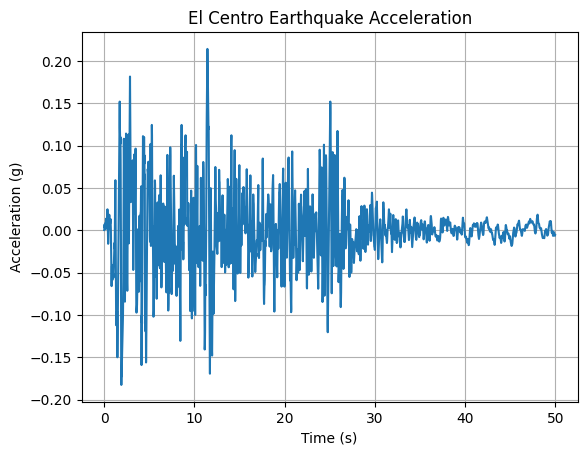

In [2]:
#Space for code...
#Hint make use of loadmat, and odeint 
earthquake = scipy.io.loadmat("./ElCentro.mat")
# the MAT file contains the data under key 'ElCentro' as an (N,2) array [time, acc]
data = earthquake.get('ElCentro')

time = data[:,0]
ground_acceleration = data[:,1]
plt.plot(time, ground_acceleration)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.title('El Centro Earthquake Acceleration')
plt.grid()
plt.show()

k1 = 1500  # stiffness of the first floor (N/m)
k2 = 1000  # stiffness of the second floor (N/m)
k3 = 800   # stiffness of the third floor (N/m)
m1 = 100   # mass of the first floor (kg)
m2 = 100   # mass of the second floor (kg)
m3 = 100   # mass of the third floor (kg)

In [ ]:
# Numeric mass and stiffness matrices (from given values k1,k2,k3,m1,m2,m3)
# these use the constants defined earlier in the notebook
M_task1 = np.diag([m1, m2, m3])
K_task1 = np.array([[k1+k2, -k2,     0],
                    [-k2,   k2+k3, -k3],
                    [0,     -k3,    k3]])
print('Mass matrix M =\n', M_task1)
print('\nStiffness matrix K =\n', K_task1)

<h3>Task 3: modal analysis</h3>
<i> Use the scipy.linalg.eig function to calculate the natural frequencies (in Hz) and the mode shapes of the structure. Normalize each mode shape with respect to the element with the maximum absolute value. Plot the normalized mode shapes.</i>

In [3]:
from scipy.linalg import eig

#Space for code...

def build_stiffness_matrix(k):
    k = np.asarray(k, dtype=float)
    n = k.size
    K = np.zeros((n, n), dtype=float)
    for i in range(n):
        if i == 0:
            K[i, i] = k[0] + (k[1] if n > 1 else 0)
        elif i == n - 1:
            K[i, i] = k[-1]
            K[i, i-1] = -k[-1]
            K[i-1, i] = -k[-1]
        else:
            K[i, i] = k[i] + k[i+1]
            K[i, i-1] = -k[i]
            K[i-1, i] = -k[i]
            K[i, i+1] = -k[i+1]
            K[i+1, i] = -k[i+1]
    return K

k = [k1, k2, k3] 
K = build_stiffness_matrix(k)
print(K)

def build_mass_matrix(m):
    m = np.asarray(m, dtype=float)
    M = np.diag(m)
    return M
m = [m1, m2, m3]
M = build_mass_matrix(m)
print(M)

eigenvalues, eigenvectors = scipy.linalg.eig(K, M)

# Natural frequencies in rad/s
omega_n = np.sqrt(np.real(eigenvalues)) #rad/s
f_n = omega_n / (2 * np.pi)             #Hz
# Sort by frequency

idx = np.argsort(f_n)
f_n = f_n[idx]
eigenvectors = eigenvectors[:, idx]

print("Natural Frequencies (Hz):")
for i, freq in enumerate(f_n):
    print(f"Mode {i+1}: {freq:.4f} Hz")

# Normalize mode shapes by maximum absolute value
mode_shapes_normalized = eigenvectors.copy()
for i in range(mode_shapes_normalized.shape[1]):
    max_val = np.max(np.abs(mode_shapes_normalized[:, i]))
    mode_shapes_normalized[:, i] /= max_val

print("===================================")
print(mode_shapes_normalized)
print(omega_n)

[[ 2500. -1000.     0.]
 [-1000.  1800.  -800.]
 [    0.  -800.   800.]]
[[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
Natural Frequencies (Hz):
Mode 1: 0.2425 Hz
Mode 2: 0.6297 Hz
Mode 3: 0.9146 Hz
[[ 0.31300925  1.          1.        ]
 [ 0.70987324  0.9343567  -0.80225529]
 [ 1.         -0.97628406  0.25649031]]
[5.74652529 3.95682108 1.52348748]


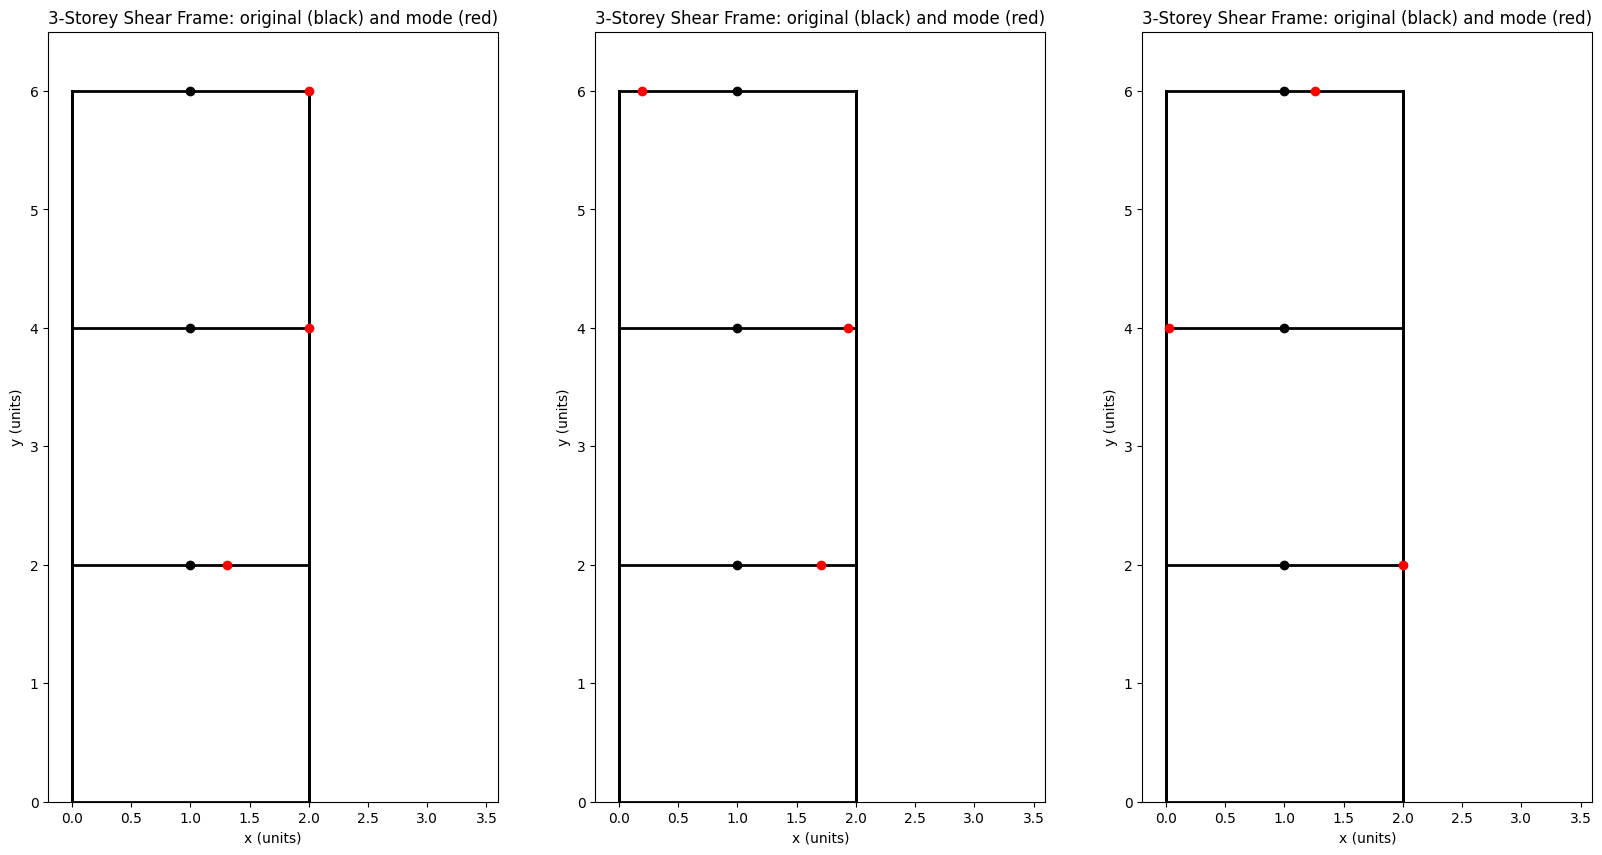

In [ ]:
total_height = 6.0
bay_length = 2.0
n_stories = 3
story_height = total_height / n_stories


y_levels = np.linspace(0, total_height, n_stories+1)

# original frame: two columns at x=0 and x=bay_length, beams at each level
x_left = np.zeros_like(y_levels)
x_right = np.full_like(y_levels, bay_length)

fig, ax = plt.subplots(1,3,figsize=(20,10))
# draw original columns
xx = [0,1,2]

mode_vec1 = np.asarray(mode_shapes_normalized[0]).flatten()
mode_vec2 = np.asarray(mode_shapes_normalized[1]).flatten()
mode_vec3 = np.asarray(mode_shapes_normalized[2]).flatten()

floor_y = y_levels[1:]  # 1..n_stories
floor_x = np.full_like(floor_y, bay_length/2.0)
dx = mode_shapes_normalized

for i in xx:
    for yi in y_levels:
        ax[i].plot(x_left, y_levels, '-k', lw=2)
        ax[i].plot(x_right, y_levels, '-k', lw=2)
        ax[i].plot([0, bay_length], [yi, yi], '-k', lw=2)
# draw original beams (including roof and ground line)
    ax[i].plot(floor_x, floor_y, 'ko', label='original mid-span')
    ax[i].plot(floor_x + dx[i], floor_y, 'ro', label='deformed mid-span (mode)')

# tidy plot: keep positive x and y in right/up quadrant, label axes
    ax[i].set_aspect('equal', 'box')
    ax[i].set_xlim(-0.2, bay_length + bay_length*0.8)
    ax[i].set_ylim(0, total_height + 0.5)
    ax[i].set_xlabel('x (units)')
    ax[i].set_ylabel('y (units)')
    ax[i].set_title('3-Storey Shear Frame: original (black) and mode (red)')

plt.show()

### Task 4: modal damping
Assume that the system is characterized by proportional Rayleigh damping
$$\mathbf{C}=\alpha \mathbf{M} + \beta \mathbf{K}$$

Calculate  $\alpha$ and $\beta$ so that the vibration modes of the system retain 5% modal damping in the 1st and 2nd vibration modes. Hint: solve a set of two linear equations.

In [5]:
# Compute Rayleigh damping coefficients alpha and beta
import numpy as np
import scipy.linalg as la

# desired modal damping (fraction)
zeta1 = 0.05
zeta2 = 0.05


# Build linear system: [1/w1  w1] [alpha] = [2*zeta1]
#                      [1/w2  w2] [beta ] = [2*zeta2]

w1 = omega_n[0] 
w2 = omega_n[1]
A = np.array([[1.0/w1, w1],[1.0/w2, w2]], dtype=float)
b = np.array([2*zeta1, 2*zeta2], dtype=float)
alpha, beta = np.linalg.solve(A, b)

print(f'Using modal rad/s: w1={w1:.6g}, w2={w2:.6g}')
print(f'Computed Rayleigh coefficients: alpha={alpha:.6g}, beta={beta:.6g}')
# verify modal damping ratios
z1 = 0.5*(alpha/w1 + beta*w1)
z2 = 0.5*(alpha/w2 + beta*w2)
print(f'Verified modal damping: z1={z1:.6g}, z2={z2:.6g}')

Using modal rad/s: w1=5.74653, w2=3.95682
Computed Rayleigh coefficients: alpha=0.234331, beta=0.0103057
Verified modal damping: z1=0.05, z2=0.05


### Task 5: state-space representation
Bring the damped system into state-space, by forming the matrices $A$, $B$, $C$ and $D$ for absolute vibration acceleration output. Then use the function scipy.signal.StateSpace to create the corresponding system model in Python, and simulate using either scipy.signal.lsim or the same approach as above (or both). You will obtain the damped structural response under the same excitation of Task 2. Extract also the relative displacements and velocities and comment on the differences between these and the ones calculated in Task 2...

In [6]:
Minv = np.linalg.inv(M)
C_mat = alpha*M + beta*K

n = n_stories
A_ss = np.block([[np.zeros((n,n)), np.eye(n)],
                 [-Minv.dot(K),   -Minv.dot(C_mat)]])
B_ss = np.vstack([np.zeros((n,1)), -np.ones((n,1))])
C_out = np.hstack([-Minv.dot(K), -Minv.dot(C_mat)])   # absolute accel
D_out = np.zeros((n,1))

system = scipy.signal.StateSpace(A_ss, B_ss, C_out, D_out)

In [7]:
np.shape(A_ss), np.shape(B_ss), np.shape(C_out), np.shape(D_out)

((6, 6), (6, 1), (3, 6), (3, 1))

In [8]:
matA = np.zeros((2*n_stories,2*n_stories))
matA[0,1], matA[2,3], matA[4,5] = 1,1,1

matA[1,0], matA[1,2] = (-k1-k2)/m1, (k2/m1)
matA[3,0], matA[3,2] = (k2/m2), (-k2-k3)/m2
matA[5,2], matA[5,4] = k3/m3, -k3/m3

#print(matA)

i = 1.00
matB = np.zeros((2*n_stories, 1))
matB[1],matB[3],matB[5] = -i,-i,-i

matC = np.zeros((n_stories,2*n_stories))
matC[0,0], matC[1,2], matC[2,4] = -1,-1,-1

matD = np.zeros((n_stories, 1))

system_state_space = scipy.signal.StateSpace(matA,matB,matC,matD)

np.shape(matA), np.shape(matB), np.shape(matC), np.shape(matD)

# Prepare input (convert ElCentro data from 'g' to m/s^2 for physical units)
ag = ground_acceleration * 9.81

# Simulate damped response using lsim
#t_ss, y_abs_undamped, x_damped = scipy.signal.lsim(system_state_space, U=ag, T=time)
time_out, y_out, x_out = scipy.signal.lsim(system_state_space, U=ag, T=time)



In [9]:
print(A_ss)
print('------------------------------------------------')
print(matA)
print("-------------------------------------------------")
print(C_mat)

[[  0.           0.           0.           1.           0.
    0.        ]
 [  0.           0.           0.           0.           1.
    0.        ]
 [  0.           0.           0.           0.           0.
    1.        ]
 [-25.          10.          -0.          -0.49197432   0.10305723
   -0.        ]
 [ 10.         -18.           8.           0.10305723  -0.41983426
    0.08244578]
 [ -0.           8.          -8.          -0.           0.08244578
   -0.31677703]]
------------------------------------------------
[[  0.   1.   0.   0.   0.   0.]
 [-25.   0.  10.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.]
 [ 10.   0. -18.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.]
 [  0.   0.   8.   0.  -8.   0.]]
-------------------------------------------------
[[ 49.19743209 -10.30572302   0.        ]
 [-10.30572302  41.98342597  -8.24457842]
 [  0.          -8.24457842  31.67770295]]


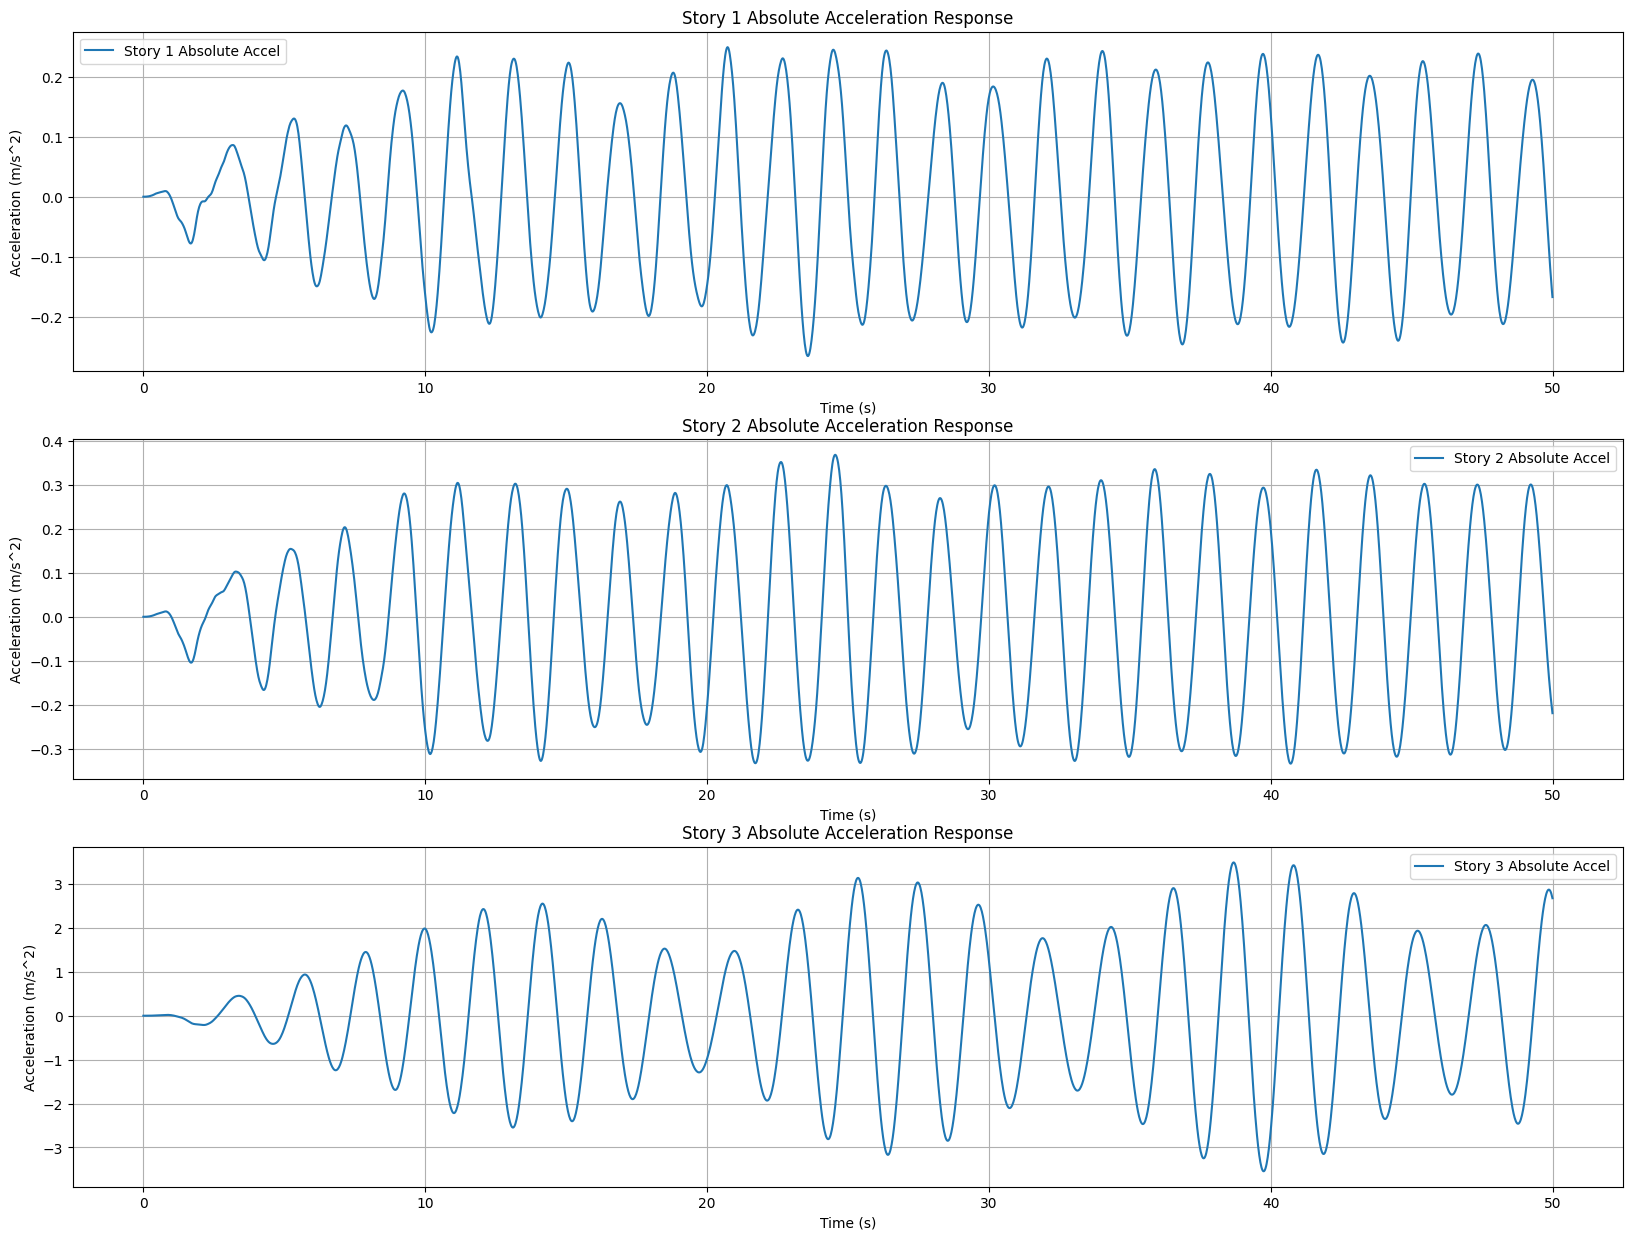

In [10]:
fig1, ax1 = plt.subplots(3,1,figsize=(20,15))
for i in range(n_stories):
    ax1[i].plot(time_out, y_out[:,i], label=f'Story {i+1} Absolute Accel')
    ax1[i].set_xlabel('Time (s)')
    ax1[i].set_ylabel('Acceleration (m/s^2)')
    ax1[i].set_title(f'Story {i+1} Absolute Acceleration Response')
    ax1[i].grid()
    ax1[i].legend()

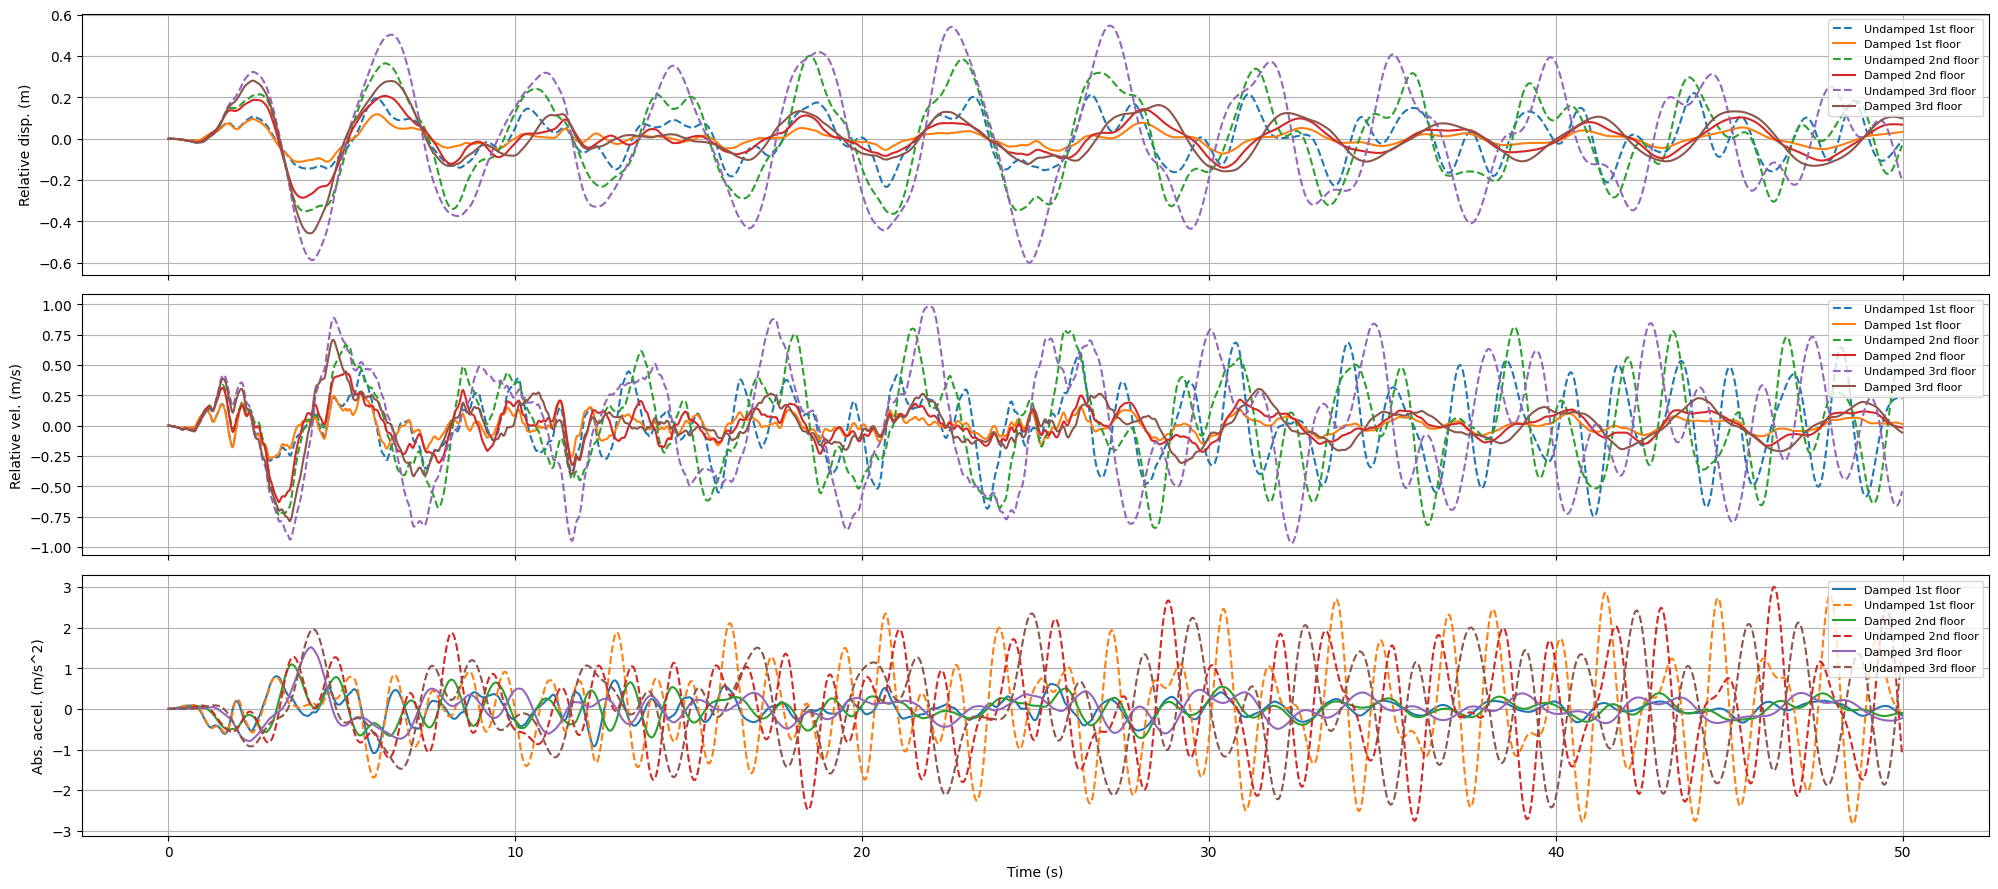

DOF 1: max |u| undamped = 2.3276e-01 m, damped = 1.1855e-01 m  (reduction 49.1%)
DOF 2: max |u| undamped = 4.0099e-01 m, damped = 2.8514e-01 m  (reduction 28.9%)
DOF 3: max |u| undamped = 5.9911e-01 m, damped = 4.5735e-01 m  (reduction 23.7%)


In [12]:
C_mat = alpha * M + beta * K

n = n_stories

# Inverse of M (M is diagonal here)
Minv = np.linalg.inv(M)

# State-space matrices for x = [u; v] where v = u_dot
Z = np.zeros((n, n))
I = np.eye(n)

A_ss = np.block([
    [Z, I],
    [-Minv.dot(K), -Minv.dot(C_mat)]
])

# Input is ground acceleration a_g(t). State eqn: x_dot = A x + B a_g
# u_dd = -M^{-1}K u - M^{-1}C v - 1 * a_g  => bottom block of B is -ones
B_ss = np.vstack([np.zeros((n, 1)), -np.ones((n, 1))])

# Output: absolute acceleration = u_dd + a_g*ones = M^{-1}(-K u - C v)
# therefore output depends only on states (no direct feedthrough)
C_out = np.hstack([ -Minv.dot(K), -Minv.dot(C_mat) ])
D_out = np.zeros((n, 1))

# Create continuous-time state-space model
system_damped = scipy.signal.StateSpace(A_ss, B_ss, C_out, D_out)

# Prepare input (convert ElCentro data from 'g' to m/s^2 for physical units)
ag = ground_acceleration * 9.81

# Simulate damped response using lsim
t_ss, y_abs_damped, x_damped = scipy.signal.lsim(system_damped, U=ag, T=time)
# x_damped columns: [u_rel, v_rel]
u_rel_damped = x_damped[:, :n]
v_rel_damped = x_damped[:, n:]

# --- Undamped solution (Task 2 style using odeint) ---
# Solve M u_dd + K u = -M * 1 * a_g  -> u_dd = -M^{-1}K u - 1*a_g

def undamped_rhs(x, t, M, K, t_vec, ag_vec):
    u = x[:n]
    v = x[n:]
    a_g_t = np.interp(t, t_vec, ag_vec)
    u_dd = -np.linalg.solve(M, K.dot(u)) - np.ones(n) * a_g_t
    return np.hstack([v, u_dd])

x0 = np.zeros(2 * n)
sol_undamped = odeint(undamped_rhs, x0, time, args=(M, K, time, ag))

u_rel_undamped = sol_undamped[:, :n]
v_rel_undamped = sol_undamped[:, n:]

# Absolute accelerations for undamped: a_abs = u_dd + a_g*ones = -M^{-1}K u
abs_acc_undamped = (-Minv.dot(K).dot(u_rel_undamped.T)).T

# --- Plots: compare undamped vs damped ---
fig, axes = plt.subplots(3, 1, figsize=(20, 9), sharex=True)
labels = ['1st floor', '2nd floor', '3rd floor']

# Relative displacements
for i in range(n):
    axes[0].plot(time, u_rel_undamped[:, i], '--', label=f'Undamped {labels[i]}')
    axes[0].plot(time, u_rel_damped[:, i], '-', label=f'Damped {labels[i]}')
axes[0].set_ylabel('Relative disp. (m)')
axes[0].legend(loc='upper right', fontsize=8)
axes[0].grid(True)

# Relative velocities
for i in range(n):
    axes[1].plot(time, v_rel_undamped[:, i], '--', label=f'Undamped {labels[i]}')
    axes[1].plot(time, v_rel_damped[:, i], '-', label=f'Damped {labels[i]}')
axes[1].set_ylabel('Relative vel. (m/s)')
axes[1].legend(loc='upper right', fontsize=8)
axes[1].grid(True)

# Absolute accelerations
for i in range(n):
    axes[2].plot(time, y_abs_damped[:, i], '-', label=f'Damped {labels[i]}')
    axes[2].plot(time, abs_acc_undamped[:, i], '--', label=f'Undamped {labels[i]}')
axes[2].set_ylabel('Abs. accel. (m/s^2)')
axes[2].set_xlabel('Time (s)')
axes[2].legend(loc='upper right', fontsize=8)
axes[2].grid(True)

plt.tight_layout()
plt.show()

# --- Quick quantitative comparison (max amplitudes) ---
for i in range(n):
    max_u_und = np.max(np.abs(u_rel_undamped[:, i]))
    max_u_damp = np.max(np.abs(u_rel_damped[:, i]))
    reduction_pct = 100.0 * (1 - max_u_damp / max_u_und) if max_u_und > 0 else 0.0
    print(f"DOF {i+1}: max |u| undamped = {max_u_und:.4e} m, damped = {max_u_damp:.4e} m  (reduction {reduction_pct:.1f}%)")

# The state-space `system_damped` provides absolute accelerations directly in `y_abs_damped`.


### Task 5 — Comments on damped vs undamped response

- **Main observation:** the damped system shows notably smaller peak responses and faster decay after excitation compared with the undamped solution. Peak relative displacements and velocities are reduced (see printed maxima), and residual oscillations are much smaller. ✅

- **Relative displacements / velocities:** damping removes modal energy so amplitudes drop and vibrations die out sooner (reduction shown in percent above). The modal shapes remain the same but modal amplitudes are attenuated.

- **Absolute accelerations:** absolute accelerations computed from the damped state-space are less amplified and exhibit smaller sustained oscillations than the undamped case — damping lowers transient peaks and shortens ringing.

- **Takeaway:** include damping in the model to obtain physically realistic, decaying response and lower peak demands on the structure. 💡


### Task 6: Laplace domain
Using the function scipy.signal.ss2tf to derive the transfer functions of the masses and the ground acceleration and form these transfer functions using scipy.signal.TransferFunction. What are the roots of the numerator and denominator of each transfer function? Are the roots of the denominator stable? Hint: use the .poles attribute of the transfer functions. 



In [15]:
# Derive transfer functions from the state-space model
# (input = ground acceleration, outputs = absolute accelerations of the 3 masses)
num, den = scipy.signal.ss2tf(A_ss, B_ss, C_out, D_out, input=0)

print(f"ss2tf returned num shape = {np.shape(num)}, den order = {len(den)-1}")

transfer_functions = []
for i in range(num.shape[0]):
    num_i = num[i]
    # compute zeros (remove leading zeros before finding roots)
    num_trim = np.trim_zeros(num_i, 'f')
    zeros = np.roots(num_trim) if num_trim.size > 0 else np.array([])

    # form TransferFunction object (SciPy accepts leading zeros in numerator)
    tf_i = scipy.signal.TransferFunction(num_i, den)
    transfer_functions.append(tf_i)

    # poles (denominator roots) via .poles attribute
    poles = tf_i.poles
    stable = np.all(np.real(poles) < 0)

    print('\nTransfer function for output (mass) {:d}:'.format(i+1))
    print('  Numerator coefficients: {}'.format(np.round(num_i, 6)))
    print('  Denominator coefficients: {}'.format(np.round(den, 6)))
    print('  Zeros  (numerator roots):')
    if zeros.size:
        for z in zeros:
            print('    {: .6e} {:+.6e}j'.format(np.real(z), np.imag(z)))
    else:
        print('    (no finite zeros)')
    print('  Poles  (denominator roots):')
    for p in poles:
        print('    {: .6e} {:+.6e}j   Re(p)={:.6e}'.format(np.real(p), np.imag(p), np.real(p)))
    print('  Denominator stable (all Re(poles) < 0)?', stable)

# quick consistency check
all_same_poles = all(np.allclose(transfer_functions[0].poles, tf.poles) for tf in transfer_functions[1:])
print('\nAll outputs share the same denominator (poles)?', all_same_poles)

ss2tf returned num shape = (3, 7), den order = 6

Transfer function for output (mass) 1:
  Numerator coefficients: [0.00000000e+00 3.88917000e-01 1.53106300e+01 2.35630470e+01
 3.96225657e+02 1.84729287e+02 1.20000000e+03]
  Denominator coefficients: [1.00000000e+00 1.22858600e+00 5.14779700e+01 3.69457190e+01
 6.36225657e+02 1.84729287e+02 1.20000000e+03]
  Zeros  (numerator roots):
    -3.847393e+01 +0.000000e+00j
    -2.594258e-01 +4.730630e+00j
    -2.594258e-01 -4.730630e+00j
    -1.872785e-01 +1.880900e+00j
    -1.872785e-01 -1.880900e+00j
  Poles  (denominator roots):
    -2.873263e-01 +5.739338e+00j   Re(p)=-2.873263e-01
    -2.873263e-01 -5.739338e+00j   Re(p)=-2.873263e-01
    -1.978411e-01 +3.951872e+00j   Re(p)=-1.978411e-01
    -1.978411e-01 -3.951872e+00j   Re(p)=-1.978411e-01
    -1.291255e-01 +1.518006e+00j   Re(p)=-1.291255e-01
    -1.291255e-01 -1.518006e+00j   Re(p)=-1.291255e-01
  Denominator stable (all Re(poles) < 0)? True

Transfer function for output (mass) 2:
 

<h3>Task 7: Analysis of frequency response functions (Laplace domain)</h3>
Using the function scipy.signal.bode plot the frequency response functions (FRFs) for the transfer functions of Task 6. Make sure that the x-axis of the FRFs is in Hz, the magnitude units in dB and the phase units in degrees.
Using the plotted FRFs, identify the frequencies (if any), at which the amplitudes of the absolute accelerations are (ii) equal to the amplitude of the ground acceleration, (i) one order of magnitude smaller than the one of the ground acceleration, and (iii) one order of magnitude larger than the one of the ground acceleration.


Output (mass) 1 crossings:
  -20 dB (x0.1): 2.1597 Hz
  0 dB (x1): 0.2703 Hz, 0.4722 Hz, 0.6974 Hz, 0.8284 Hz, 1.0511 Hz
  +20 dB (x10): (no crossing found in 0.01–10 Hz)

Output (mass) 2 crossings:
  -20 dB (x0.1): 1.2410 Hz
  0 dB (x1): 0.3220 Hz, 0.5630 Hz, 0.9732 Hz
  +20 dB (x10): (no crossing found in 0.01–10 Hz)

Output (mass) 3 crossings:
  -20 dB (x0.1): 1.0691 Hz
  0 dB (x1): 0.7187 Hz
  +20 dB (x10): (no crossing found in 0.01–10 Hz)


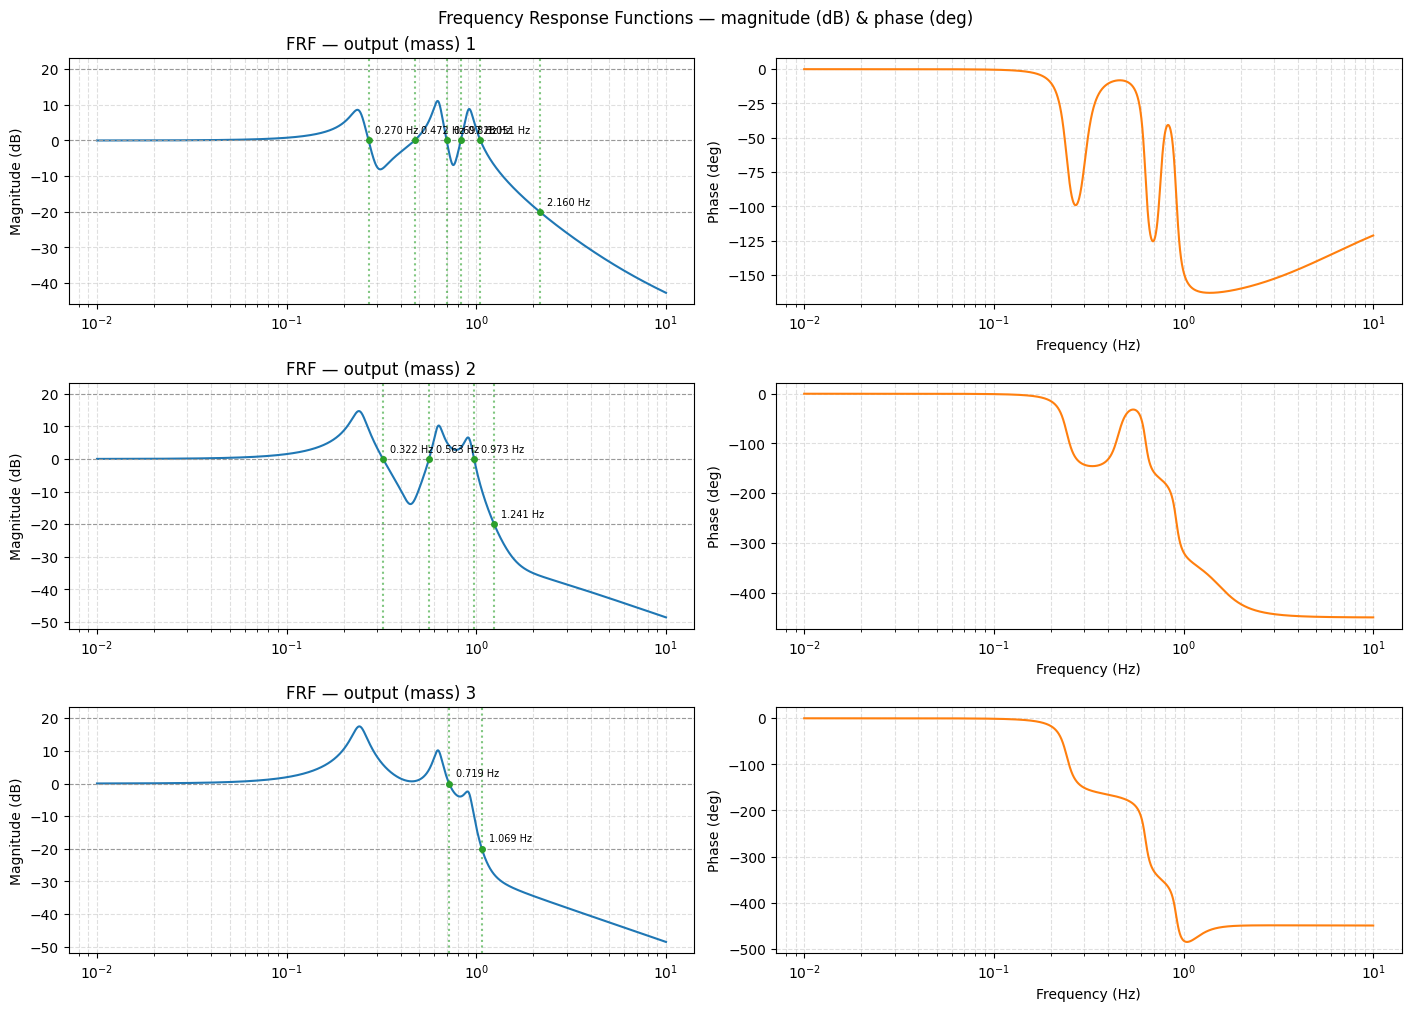

In [16]:
# Task 7: FRFs (magnitude in dB, phase in degrees) and crossing frequencies
# Frequency axis in Hz (Bode expects rad/s internally)
f = np.logspace(-2, 1, 3000)        # 0.01 Hz .. 10 Hz
w = 2.0 * np.pi * f                 # rad/s for scipy.signal.bode

thresholds_db = {"-20 dB (x0.1)": -20.0, "0 dB (x1)": 0.0, "+20 dB (x10)": 20.0}

def find_crossings(freqs, mag_db, thr):
    """Return list of frequencies (Hz) where mag_db crosses thr (in dB).
       Uses linear interpolation between adjacent points where sign change occurs."""
    y = mag_db - thr
    # find sign changes between consecutive samples
    idx = np.where(y[:-1] * y[1:] < 0)[0]
    crossings = []
    for k in idx:
        f1, f2 = freqs[k], freqs[k+1]
        m1, m2 = mag_db[k], mag_db[k+1]
        if m2 == m1:
            f_cross = f1
        else:
            f_cross = f1 + (thr - m1) * (f2 - f1) / (m2 - m1)
        crossings.append(f_cross)
    # also include exact matches
    eq_idx = np.where(np.isclose(mag_db, thr, atol=1e-6))[0]
    for k in eq_idx:
        f_val = freqs[k]
        if not any(np.isclose(f_val, c, atol=1e-9) for c in crossings):
            crossings.append(f_val)
    crossings.sort()
    return crossings

# Plot FRFs (3 outputs) — magnitude (dB) and phase (deg)
fig, axes = plt.subplots(3, 2, figsize=(14, 10), constrained_layout=True)
for i, tf in enumerate(transfer_functions):
    w_out, mag_db, phase_deg = scipy.signal.bode(tf, w)
    ax_mag = axes[i, 0]
    ax_phs = axes[i, 1]

    # Magnitude (dB)
    ax_mag.semilogx(f, mag_db, color='C0')
    ax_mag.set_ylabel('Magnitude (dB)')
    ax_mag.set_title(f'FRF — output (mass) {i+1}')
    ax_mag.grid(True, which='both', ls='--', alpha=0.4)
    # plot horizontal reference lines for thresholds
    for thr in thresholds_db.values():
        ax_mag.axhline(thr, color='0.6', ls='--', lw=0.8)

    # Phase (deg)
    ax_phs.semilogx(f, phase_deg, color='C1')
    ax_phs.set_ylabel('Phase (deg)')
    ax_phs.set_xlabel('Frequency (Hz)')
    ax_phs.grid(True, which='both', ls='--', alpha=0.4)

    # find and annotate crossing frequencies for each threshold
    for label, thr in thresholds_db.items():
        crosses = find_crossings(f, mag_db, thr)
        if crosses:
            for fc in crosses:
                mag_at_fc = np.interp(fc, f, mag_db)
                ax_mag.axvline(fc, color='C2', ls=':', alpha=0.6)
                ax_mag.plot(fc, mag_at_fc, 'o', color='C2', markersize=4)
                ax_mag.annotate(f'{fc:.3f} Hz', xy=(fc, mag_at_fc), xytext=(5, 5),
                                textcoords='offset points', fontsize=7)
        else:
            # nothing found in search range
            pass

    # print summary for this output
    print(f"\nOutput (mass) {i+1} crossings:")
    for label, thr in thresholds_db.items():
        crosses = find_crossings(f, mag_db, thr)
        if crosses:
            print(f"  {label}: {', '.join([f'{c:.4f} Hz' for c in crosses])}")
        else:
            print(f"  {label}: (no crossing found in 0.01–10 Hz)")

plt.suptitle('Frequency Response Functions — magnitude (dB) & phase (deg)')
plt.show()

### Task 8: Frequency response functions from data
Using the simulated data, obtain an estimate of the frequency response function in terms of the accelerance for the undamped and damped system. Compare the two systems and comment on the differences, also compare these to the FRFs from Task 7 and comment on any differences...

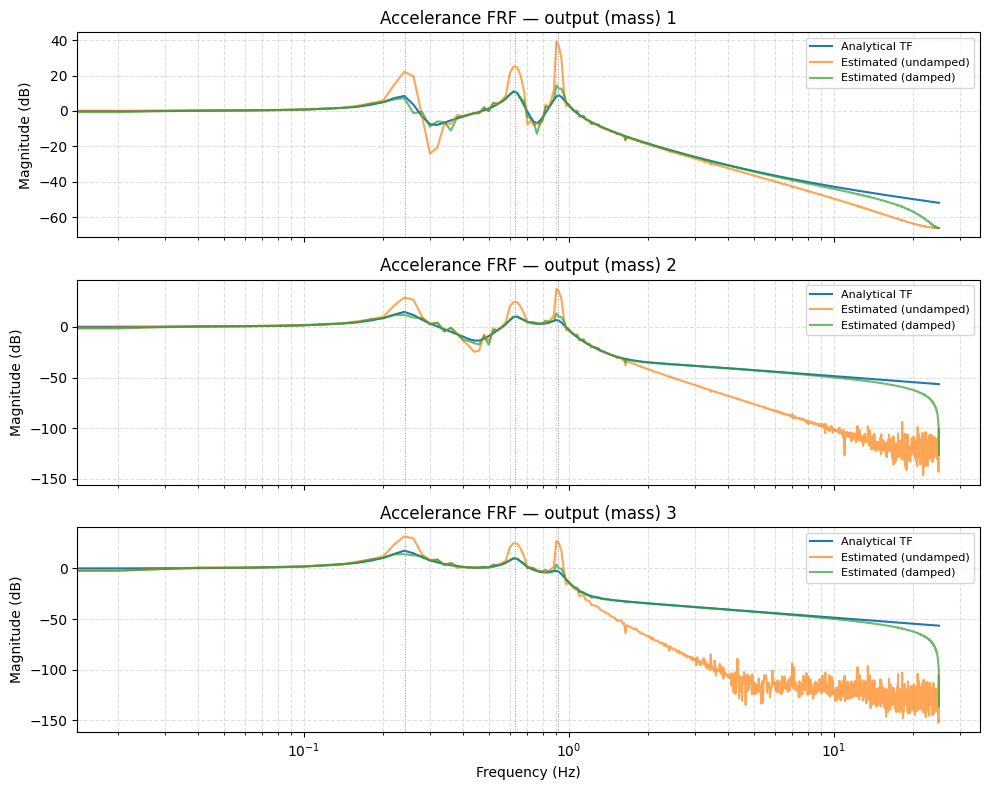


Comparison at modal frequencies (magnitude in dB):

Output (mass) 1:
  at modal f1=0.2425 Hz -> analytic 8.46 dB, undamped est 22.15 dB, damped est 7.24 dB
  at modal f2=0.6297 Hz -> analytic 10.99 dB, undamped est 25.14 dB, damped est 10.99 dB
  at modal f3=0.9146 Hz -> analytic 8.82 dB, undamped est 36.70 dB, damped est 12.59 dB

Output (mass) 2:
  at modal f1=0.2425 Hz -> analytic 14.68 dB, undamped est 28.87 dB, damped est 11.83 dB
  at modal f2=0.6297 Hz -> analytic 9.47 dB, undamped est 24.43 dB, damped est 10.02 dB
  at modal f3=0.9146 Hz -> analytic 6.09 dB, undamped est 34.71 dB, damped est 10.01 dB

Output (mass) 3:
  at modal f1=0.2425 Hz -> analytic 17.49 dB, undamped est 31.74 dB, damped est 14.03 dB
  at modal f2=0.6297 Hz -> analytic 9.97 dB, undamped est 24.89 dB, damped est 10.11 dB
  at modal f3=0.9146 Hz -> analytic -3.27 dB, undamped est 24.78 dB, damped est 0.38 dB

Comments:
- The damped responses (analytic and estimated) show reduced peak amplitudes and broader 

In [17]:
# Task 8: FRF estimates (accelerance) from simulated time signals
# We'll compute FFT-based FRF estimates for the undamped and damped outputs
# and compare them with the analytical FRFs from Task 7.

# sampling
dt = np.mean(np.diff(time))
N = len(time)
fs = 1.0 / dt
# frequency axis (positive frequencies)
f = np.fft.rfftfreq(N, dt)

# apply same window to input and outputs to reduce leakage
window = np.hanning(N)

# FFTs
U = np.fft.rfft(ag * window)

H_est_und = []
H_est_damp = []
for i in range(n_stories):
    Yu = np.fft.rfft(abs_acc_undamped[:, i] * window)
    Yd = np.fft.rfft(y_abs_damped[:, i] * window)
    # ratio estimate (accelerance): output_acc / input_acc
    H_u = Yu / U
    H_d = Yd / U
    # avoid spurious values where input spectrum is almost zero
    H_u[np.abs(U) < 1e-12] = np.nan
    H_d[np.abs(U) < 1e-12] = np.nan
    H_est_und.append(H_u)
    H_est_damp.append(H_d)

# analytical FRF (same frequency vector)
w = 2.0 * np.pi * f
H_analytic = [scipy.signal.freqresp(tf, w)[1] for tf in transfer_functions]

# Plot magnitude comparison (dB)
fig, axes = plt.subplots(n_stories, 1, figsize=(10, 8), sharex=True)
for i in range(n_stories):
    Ha = H_analytic[i]
    Hu = H_est_und[i]
    Hd = H_est_damp[i]

    # convert to dB (add small floor to avoid -inf)
    mag_a_db = 20.0 * np.log10(np.abs(Ha) + 1e-20)
    mag_u_db = 20.0 * np.log10(np.abs(Hu) + 1e-20)
    mag_d_db = 20.0 * np.log10(np.abs(Hd) + 1e-20)

    axes[i].semilogx(f, mag_a_db, label='Analytical TF', color='C0')
    axes[i].semilogx(f, mag_u_db, label='Estimated (undamped)', color='C1', alpha=0.7)
    axes[i].semilogx(f, mag_d_db, label='Estimated (damped)', color='C2', alpha=0.7)
    # mark modal frequencies
    for fn in f_n:
        axes[i].axvline(fn, color='0.6', ls=':', lw=0.7)
    axes[i].set_ylabel('Magnitude (dB)')
    axes[i].set_title(f'Accelerance FRF — output (mass) {i+1}')
    axes[i].grid(True, which='both', ls='--', alpha=0.4)
    axes[i].legend(loc='upper right', fontsize=8)

axes[-1].set_xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

# Quantitative comparison at modal frequencies
print('\nComparison at modal frequencies (magnitude in dB):')
for i in range(n_stories):
    print(f'\nOutput (mass) {i+1}:')
    for j, fn in enumerate(f_n):
        idx = np.argmin(np.abs(f - fn))
        mag_a = 20.0 * np.log10(np.abs(H_analytic[i][idx]) + 1e-20)
        mag_u = 20.0 * np.log10(np.abs(H_est_und[i][idx]) + 1e-20)
        mag_d = 20.0 * np.log10(np.abs(H_est_damp[i][idx]) + 1e-20)
        print(f'  at modal f{j+1}={fn:.4f} Hz -> analytic {mag_a:.2f} dB, undamped est {mag_u:.2f} dB, damped est {mag_d:.2f} dB')

# Short comments (print)
print('\nComments:')
print('- The damped responses (analytic and estimated) show reduced peak amplitudes and broader resonances compared with the undamped case (damping lowers amplification).')
print('- FFT-based estimates match the analytic FRF near modal peaks where the earthquake input contains energy; estimates are noisy where the input spectrum is weak (transient earthquake).')
print('- Discrepancies arise from finite-time transient input, windowing/leakage and limited SNR — use Welch/CSD for smoother estimates if needed.')

Space for comments....